In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from collections import defaultdict

Dealing with WANDB Data

In [61]:
print("DEBUG: Unpacking data")
results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data/norm-norm-1.csv"
results = pd.read_csv(results_path)

results = results.fillna(0)

strategies = ['h.', '1.', '10.', 't.']
results_by_strategy = []

for strategy in strategies:
    results_by_strategy.append(results.filter(like='experiment_score_' + strategy))
results_by_strategy[0]


DEBUG: Unpacking data


,experiment_score_h.76.0,experiment_score_h.38.0,experiment_score_h.46.0,experiment_score_h.90.0,experiment_score_h.68.0,experiment_score_h.15.0,experiment_score_h.53.0,experiment_score_h.61.0,experiment_score_h.41.0,experiment_score_h.4.0,...,experiment_score_h.52.0,experiment_score_h.56.0,experiment_score_h.29.0,experiment_score_h.48.0,experiment_score_h.21.0,experiment_score_h.67.0,experiment_score_h.39.0,experiment_score_h.20.0,experiment_score_h.16.0,experiment_score_h.27.0
0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.079324,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000
1,0.0,0.00000,0.301371,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.092844,0.00000
2,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.11932
3,0.0,0.09614,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.136714,0.0,0.0,0.00000,0.000000,0.000000,0.00000
4,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000
485,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.412229,0.000000,0.00000
486,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.004789,0.0,0.0,0.28312,0.000000,0.000000,0.00000
487,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.508663,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000


In [62]:
results_by_strategy = [df.rename(columns=lambda x: x.replace('experiment_score_'+strategy, '')) for df, strategy in zip(results_by_strategy,strategies)]
for i in range(len(results_by_strategy)):
    results_by_strategy[i] = results_by_strategy[i].reindex(sorted(results_by_strategy[i].columns, key=lambda x: float(x)), axis=1)

results_by_strategy[0]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
0,0.0,0.0,0.0,0.0,0.079324,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.323137,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.083618,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
485,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
486,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.327243,0.000000,0.0,0.0,0.0
487,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [63]:
# Finding cumulative divergence for each strategy
print("DEBUG: Calculating cumulative divergence")
cumulative_divergence = []

for strategy in results_by_strategy:
    divergence_for_agent = []
    for column in strategy.columns:
        divergence_for_agent.append(strategy[column].sum())
    cumulative_divergence.append(divergence_for_agent)

# Find the agents with the highest divergence for each strategy
highest_divergence_agents = [np.argmax(divergence) for divergence in cumulative_divergence]

# Print the agents with the highest divergence for each strategy
for i, agent in enumerate(highest_divergence_agents):
    print(f"Strategy {strategies[i]}: Agent with highest divergence is {agent}")

# Calculate and print the average divergence for each strategy
average_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
for i, avg_div in enumerate(average_divergence):
    print(f"Strategy {strategies[i]}: Average divergence is {avg_div}")

# Print the divergence of the agent with the highest divergence for each strategy
for i, agent in enumerate(highest_divergence_agents):
    print(f"Strategy {strategies[i]}: Divergence of agent {agent} is {cumulative_divergence[i][agent]}")

# Finding the 99th percentile of agents
for i, strategy in enumerate(results_by_strategy):
    worst_off_divergence = cumulative_divergence[i]
    percentile_99 = np.percentile(worst_off_divergence, 99)
    print(f"Strategy {strategies[i]}: 99th percentile of the worst off agents' divergence: {percentile_99}")

    agents_outside_99th_percentile = [agent for agent in range(len(worst_off_divergence)) if worst_off_divergence[agent] > percentile_99]
    print(f"Strategy {strategies[i]}: Agents outside the 99th percentile: {agents_outside_99th_percentile}")

DEBUG: Calculating cumulative divergence
Strategy h.: Agent with highest divergence is 83
Strategy 1.: Agent with highest divergence is 83
Strategy 10.: Agent with highest divergence is 83
Strategy t.: Agent with highest divergence is 83
Strategy h.: Average divergence is 7.843018554865573
Strategy 1.: Average divergence is 7.986650438835425
Strategy 10.: Average divergence is 7.855263684318673
Strategy t.: Average divergence is 7.763695624910355
Strategy h.: Divergence of agent 83 is 18.060420287888512
Strategy 1.: Divergence of agent 83 is 17.84453370498478
Strategy 10.: Divergence of agent 83 is 18.074030017199668
Strategy t.: Divergence of agent 83 is 18.077569579866235
Strategy h.: 99th percentile of the worst off agents' divergence: 13.91688360409502
Strategy h.: Agents outside the 99th percentile: [83]
Strategy 1.: 99th percentile of the worst off agents' divergence: 13.686209828022173
Strategy 1.: Agents outside the 99th percentile: [83]
Strategy 10.: 99th percentile of the wor

Finding the average number of agents outside of a certain percentile for each strategy for every norm run

In [64]:
# Repeat the process for all 10 runs
strategy_1 = []
strategy_10 = []
strategy_t = []
strategy_hcva = []
strategy_results = [strategy_1, strategy_10, strategy_t, strategy_hcva]
#for run in range(1, 11):
#print("DEBUG: Unpacking data")
results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data/vibrant-vortex-69.csv"

#results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/wandb_run_data/norm-util-run-"+str(run)+".csv"
results = pd.read_csv(results_path)

results = results.fillna(0)

strategies = ['h.', '1.', '10.', 't.']

results_by_strategy = []

for strategy in strategies:
    results_by_strategy.append(results.filter(like='experiment_score_' + strategy))
results_by_strategy[0]

results_by_strategy = [df.rename(columns=lambda x: x.replace('experiment_score_'+strategy, '')) for df, strategy in zip(results_by_strategy,strategies)]
for i in range(len(results_by_strategy)):
    results_by_strategy[i] = results_by_strategy[i].reindex(sorted(results_by_strategy[i].columns, key=lambda x: float(x)), axis=1)

results_by_strategy[0]

# Finding cumulative divergence for each strategy
#print("DEBUG: Calculating cumulative divergence")
cumulative_divergence = []

for strategy in results_by_strategy:
    divergence_for_agent = []
    for column in strategy.columns:
        divergence_for_agent.append(strategy[column].sum())
    cumulative_divergence.append(divergence_for_agent)

# Find the agents with the highest divergence for each strategy
highest_divergence_agents = [np.argmax(divergence) for divergence in cumulative_divergence]

# Print the agents with the highest divergence for each strategy
#for i, agent in enumerate(highest_divergence_agents):
#    print(f"Strategy {strategies[i]}: Agent with highest divergence is {agent}")

# Calculate and print the average divergence for each strategy
#average_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
#for i, avg_div in enumerate(average_divergence):
#    print(f"Strategy {strategies[i]}: Average divergence is {avg_div}")

# Print the divergence of the agent with the highest divergence for each strategy
#for i, agent in enumerate(highest_divergence_agents):
#    print(f"Strategy {strategies[i]}: Divergence of agent {agent} is {cumulative_divergence[i][agent]}")

# Finding the 99th percentile of agents
"""
for i, strategy in enumerate(results_by_strategy):
    worst_off_divergence = cumulative_divergence[i]
    percentile_99 = np.percentile(worst_off_divergence, 98)
    #print(f"Strategy {strategies[i]}: 99th percentile of the worst off agents' divergence: {percentile_99}")

    agents_outside_99th_percentile = [agent for agent in range(len(worst_off_divergence)) if worst_off_divergence[agent] > percentile_99]
    #print(f"Strategy {strategies[i]}: Agents outside the 99th percentile: {agents_outside_99th_percentile}")
    strategy_results[i].append(agents_outside_99th_percentile)
"""


#print(cumulative_divergence)
mean_divergence = [np.mean(divergence) for divergence in cumulative_divergence]
mean_divergence_of_all = np.mean(mean_divergence)
standard_deviation_divergence = [np.std(divergence) for divergence in cumulative_divergence]
# standardise this

# find the bottom 10, and boxplot it

# Finding the statistically significant unsatisfied agents
for i, strategy in enumerate(results_by_strategy):
    unsatisfied_agents = [agent for agent in range(len(cumulative_divergence[i])) if cumulative_divergence[i][agent] > mean_divergence[i] + 2 * standard_deviation_divergence[i]]
    #unsatisfied_agents = [agent for agent in range(len(cumulative_divergence[i])) if cumulative_divergence[i][agent] > mean_divergence_of_all + 2 * standard_deviation_divergence[i]]
    print(f"Strategy {strategies[i]}: Agents with total divergence more than 2 standard deviations from the mean: {unsatisfied_agents}")


Strategy h.: Agents with total divergence more than 2 standard deviations from the mean: [23, 76, 80, 87]
Strategy 1.: Agents with total divergence more than 2 standard deviations from the mean: [23, 80, 87]
Strategy 10.: Agents with total divergence more than 2 standard deviations from the mean: [23, 68, 76, 80]
Strategy t.: Agents with total divergence more than 2 standard deviations from the mean: [23, 80, 87]


---

Finding whether there is an agent that is consistently the worst off. 
- For every decision, find the agent that was the worst off, then plot this, when there is a different agent that is the worst off, plot this but in a different colour.

[80, 80, 80, 80]


TypeError: object of type 'numpy.int64' has no len()

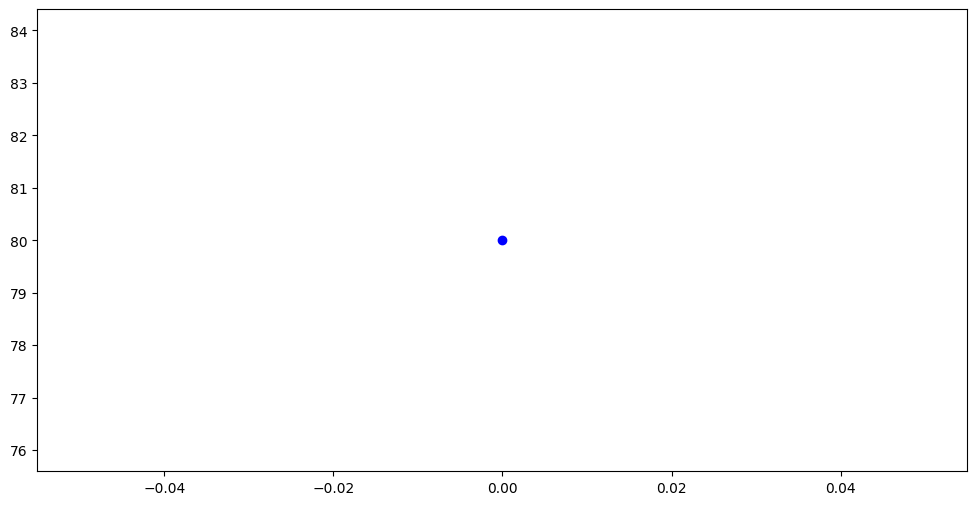

In [65]:
import matplotlib.pyplot as plt

# Extract the agent with the minimum satisfaction for each context


# Plot the worst off agents
plt.figure(figsize=(12, 6))
plt.plot(worst_off_agents[0], marker='o', linestyle='-', color='b', label='Worst Off Agent')

# Highlight changes in the worst off agent with a different color
for i in range(1, len(worst_off_agents[0])):
    if worst_off_agents[0][i] != worst_off_agents[0][i-1]:
        plt.plot(i, worst_off_agents[i], marker='o', color='r')

plt.xlabel('Context')
plt.ylabel('Agent')
plt.title('Worst Off Agent for Each Context')
plt.legend()
plt.grid(True)
plt.show()

---

In [49]:
def split_into_size_groups(data: pd.DataFrame):
    # This function splits up the dataframe into 3 corresponding to the sizes of 25x4, 10x10, and 4x25 for analysis by group

    # Contexts' 0-24 are the first 25x4, contexts' 25-34 are the first 10x10, contexts' 35-38 are the first 4x25. then the context value resets
    #   to 0 and this continues
    df_list = []
    size_groups = [(0, 25), (25, 35), (35, 39)]
    for start, end in size_groups:
        df_group = data[(data['context'] >= start) & (data['context'] < end)].reset_index(drop=True)
        df_list.append(df_group)

    return df_list

In [50]:
def unpack_data(filename: str):
    df = pd.read_csv(filename)
    return df

In [51]:
print("DEBUG: Unpacking data")
plot_savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/bluepebble_plots/"
results_path = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/bluepebble_runs/experiment_results_2024-09-27/"
results_filename = {'egal': "egal_society/egal_societyegal_society.csv", 'norm': "norm_society/norm_societynorm_society.csv", "util": "util_society/util_societyutil_society.csv", "random": "rand_society/rand_societyrand_society.csv"}

data = unpack_data(results_path + results_filename["util"])

#data = split_into_size_groups(data)

#data[0]

#for name, filename in results_filename.items():
#    data = unpack_data(results_path + filename)


DEBUG: Unpacking data


### Max/Min over time

In [52]:
"""
For every context, find the agent that is the worst off in terms of divergence, and store as a list
see if one agent (or a small group of agents in a minority) are consistently the worst off
"""
df_dict = {}
unique_p_values = data['p_value'].unique()
# Split the DataFrame by P_Value
for p_value in unique_p_values:
    df_dict[f'df_p_{p_value}'] = data[data['p_value'] == p_value].reset_index(drop=True)
for key in df_dict.keys():
    df_dict[key] = df_dict[key].sort_values(by=['agent', 'context']).reset_index(drop=True)
results_dict = {}
# Iterate over each DataFrame in df_dict
for key, df in df_dict.items():
    # Group by 'context'
    grouped = df.groupby('context')
    max_min_list = []
    for name, group in grouped:
        max_row = group.loc[group['satisfaction'].idxmax()]
        min_row = group.loc[group['satisfaction'].idxmin()]
        max_min_list.append({
            'context': name,
            'agent_max': max_row['agent'],
            'satisfaction_max': max_row['satisfaction'],
            'agent_min': min_row['agent'],
            'satisfaction_min': min_row['satisfaction']
        })
    results_dict[key] = pd.DataFrame(max_min_list)

# Save results_dict to a .csv file
for key, df in results_dict.items():
    df.to_csv(f"{key}_results.csv", index=False)


In [53]:
results_dict['df_p_0_1']

KeyError: 'df_p_0_1'

## Cumulative Divergence

In [46]:
df_dict = {}
unique_p_values = data['p_value'].unique()
print("unique_p_values: ", unique_p_values)
# Split the DataFrame by P_Value
for p_value in unique_p_values:
    df_dict[f'df_p_{p_value}'] = data[data['p_value'] == p_value].reset_index(drop=True)
print("Df keys: ", df_dict.keys())

unique_p_values:  [0 1 2 3]
Df keys:  dict_keys(['df_p_0', 'df_p_1', 'df_p_2', 'df_p_3'])


In [47]:
print(df_dict['df_p_0'])

       context  p_value  agent  satisfaction
0            0        0   78.0      0.193128
1            0        0   69.0      0.123980
2            0        0   68.0      0.326464
3            0        0   25.0      0.022045
4            1        0   41.0      0.162506
...        ...      ...    ...           ...
32395       38        0   42.0      0.185328
32396       38        0   90.0      0.188128
32397       38        0   23.0      0.209505
32398       38        0   62.0      0.221764
32399       38        0   89.0      0.027335

[32400 rows x 4 columns]


In [48]:
results_dict = {}
# Iterate over each DataFrame in df_dict
for key, df in df_dict.items():
    # Group by continuous segments where 'context' is unchanging
    df['group'] = (df['context'] != df['context'].shift()).cumsum()
    # Sum the 'satisfaction' values for each group
    grouped = df.groupby('group').agg({
        'context': 'first',
        'satisfaction': 'sum'
    }).reset_index(drop=True)
    
    # Add the p_value to the grouped DataFrame
    grouped['p_value'] = df['p_value'].iloc[0]
    
    # Store the result in the dictionary with p_value as the key
    results_dict[f'df_p_{grouped["p_value"].iloc[0]}'] = grouped

# Print the keys of the results dictionary to verify
print(results_dict.keys())
print(results_dict['df_p_0'])

dict_keys(['df_p_0', 'df_p_1', 'df_p_2', 'df_p_3'])
      context  satisfaction  p_value
0           0      0.665617        0
1           1      1.076129        0
2           2      1.176029        0
3           3      1.294335        0
4           4      1.594306        0
...       ...           ...      ...
4207       34      1.545451        0
4208       35      5.131808        0
4209       36      5.342436        0
4210       37      4.751475        0
4211       38      3.872615        0

[4212 rows x 3 columns]
